## Resizing results visualization

In [1]:
import numpy as np
import os
from os.path import join as pjoin
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from viz import viz_df_trans, compute_noise_ceiling

#### load data(based on resizing.py files)

In [2]:
layer_list = np.arange(1, 6)
datasets_n = [92, 118]
modalities = ['meg', 'fmri', 'behavior']
resize_type = ['ratio', 'fixed']
dataset_root = '/LOCAL/ydai/workingdir/dataset'
results_root = '/LOCAL/ydai/workingdir/resizing_results'

In [3]:
# meg data
set92_timepoints = np.arange(-100, 1201)
set118_timepoints = np.arange(-100, 1001)
meg_df_col = ['corr_score', 'set_idx', 'layer_idx', 'resize_type', 'resize_scale', 'sub', 'timepoint']
meg_df = pd.DataFrame(columns=meg_df_col)

for set_idx in datasets_n:
    for resize in resize_type:
        meg_dir = pjoin(results_root, 'meg')
        corr_fn = f'dataset{set_idx}_{resize}_corr.pkl'
        corr = pd.read_pickle(pjoin(meg_dir, corr_fn))
        
        if set_idx == 92:
            viz_corr = viz_df_trans(corr, meg_df_col, set92_timepoints, set_idx, resize)
        else:
            viz_corr = viz_df_trans(corr, meg_df_col, set118_timepoints, set_idx, resize)

        meg_df = pd.concat((meg_df, viz_corr), ignore_index=True)

In [4]:
# fmri data
roi_list = ['evc', 'hvc']
fmri_df_col = ['corr_score', 'set_idx', 'layer_idx', 'resize_type', 'resize_scale', 'sub', 'roi']
fmri_df = pd.DataFrame(columns=fmri_df_col)

for set_idx in datasets_n:
    for resize in resize_type:
        fmri_dir = pjoin(results_root, 'fmri')
        corr_fn = f'dataset{set_idx}_{resize}_corr.pkl'
        corr = pd.read_pickle(pjoin(fmri_dir, corr_fn))

        viz_corr = viz_df_trans(corr, fmri_df_col, roi_list, set_idx, resize)
        
        fmri_df = pd.concat((fmri_df, viz_corr), ignore_index=True)
        

In [5]:
# behavior data
behavior_df_col = ['corr_score', 'set_idx', 'layer_idx', 'resize_type', 'resize_scale', 'sub','point']
behavior_df = pd.DataFrame(columns=behavior_df_col)

for set_idx in datasets_n:
    for resize in resize_type:
        behavior_dir = pjoin(results_root, 'behavior')
        corr_fn = f'dataset{set_idx}_{resize}_corr.pkl'
        corr = pd.read_pickle(pjoin(behavior_dir, corr_fn))

        viz_corr = viz_df_trans(corr, behavior_df_col, [np.nan], set_idx, resize)
        
        behavior_df = pd.concat((behavior_df, viz_corr), ignore_index=True)
        

### image plot

In [6]:
# save images
save_pth = '/home/ydai/workingdir/resize_plots'
if not os.path.isdir(save_pth):
    os.makedirs(save_pth)

# set plot params
sns.set_style('darkgrid')
sns.set_palette('pastel')

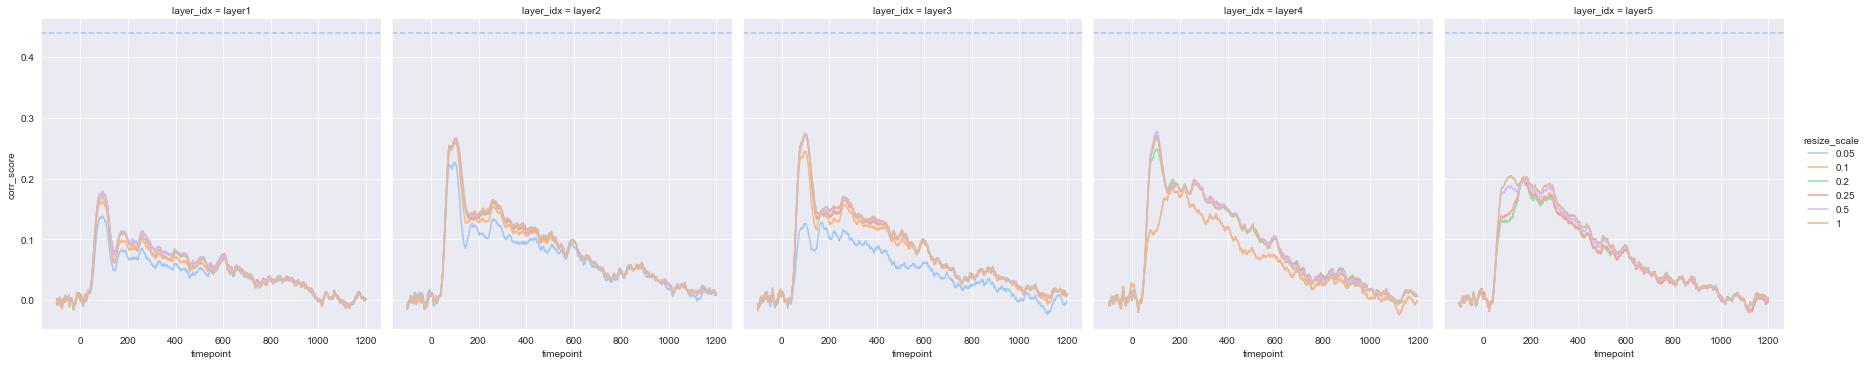

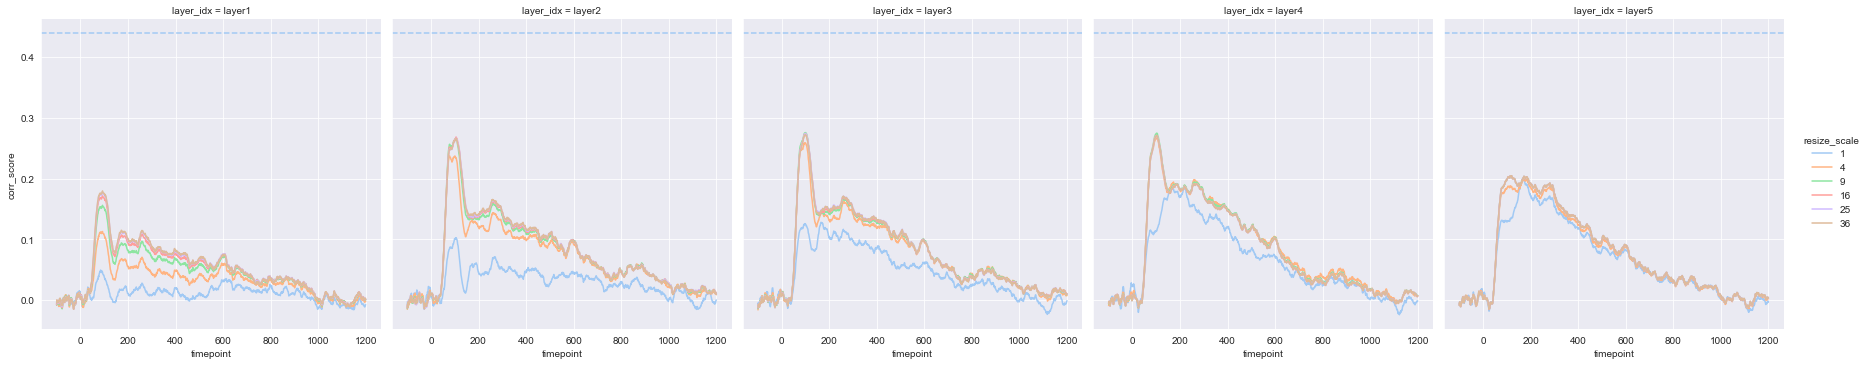

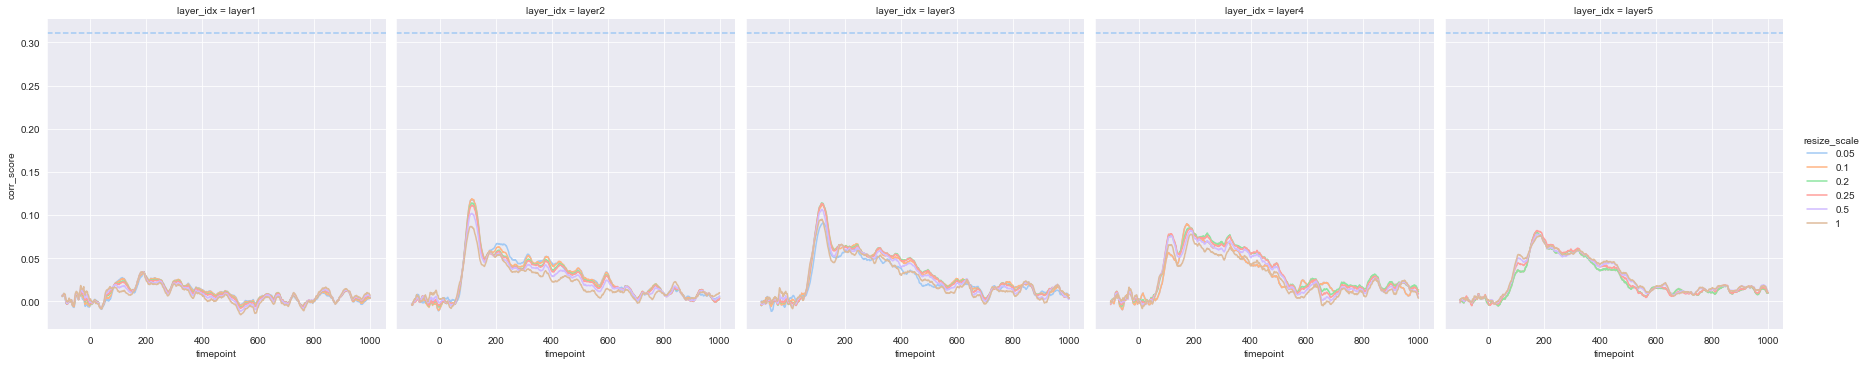

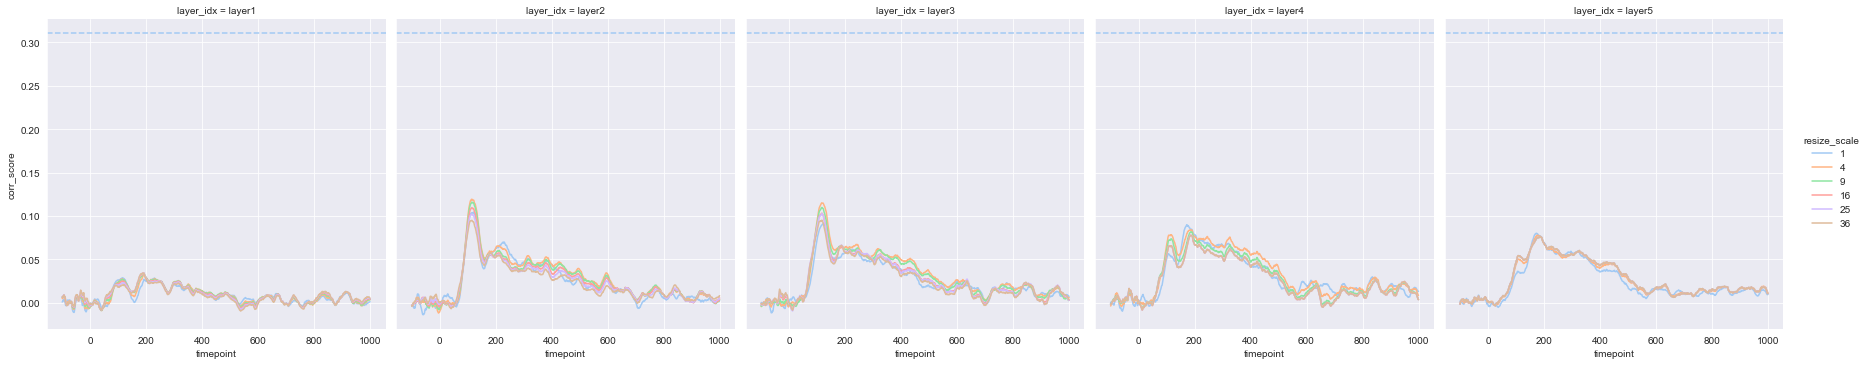

In [7]:
# meg visualization
for set_idx in datasets_n:
    for resize in resize_type:
        
        # compute noise ceiling
        meg_ceil = compute_noise_ceiling('meg', set_idx)

        plot_df = meg_df[meg_df['resize_type']==resize]
        plot_df = plot_df[plot_df['set_idx']==f'dataset{set_idx}']

        graph = sns.relplot(data=plot_df, x="timepoint", y="corr_score",col="layer_idx", 
                            hue="resize_scale", kind="line", ci=None)
        
        for ax in graph.axes[0]:
            ax.axhline(meg_ceil, ls='--')

<Figure size 432x288 with 0 Axes>

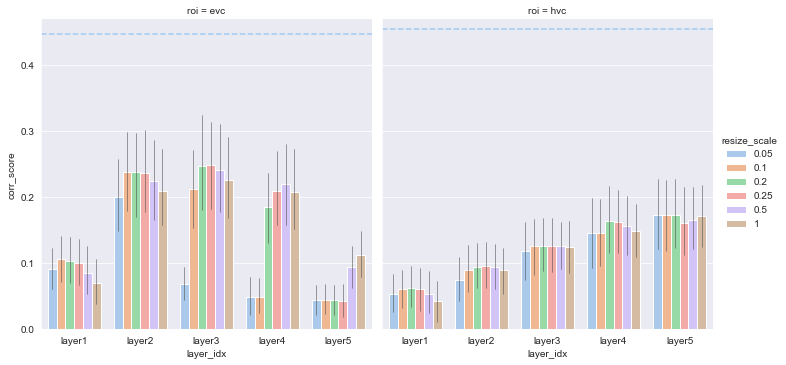

<Figure size 432x288 with 0 Axes>

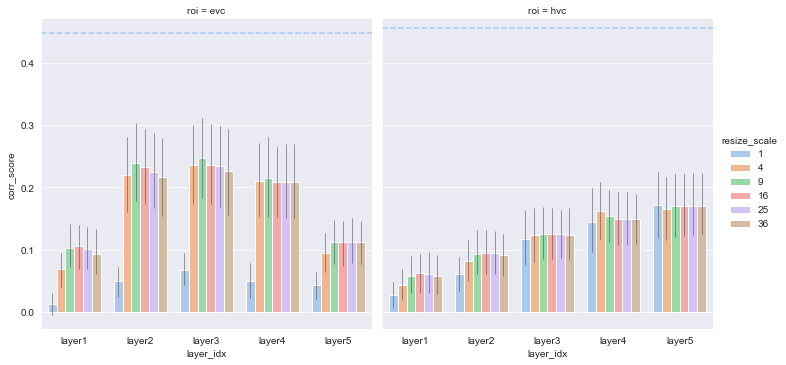

<Figure size 432x288 with 0 Axes>

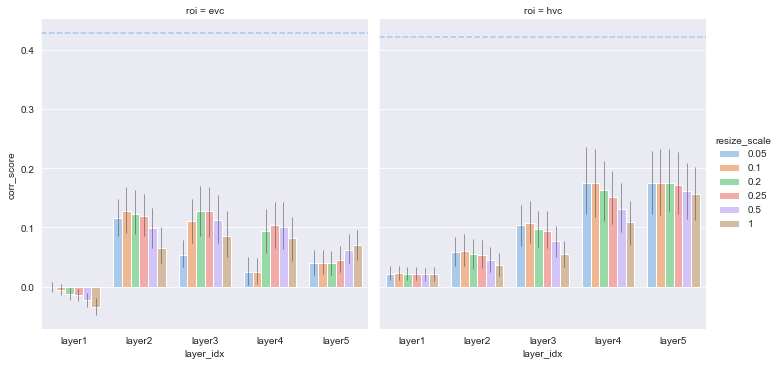

<Figure size 432x288 with 0 Axes>

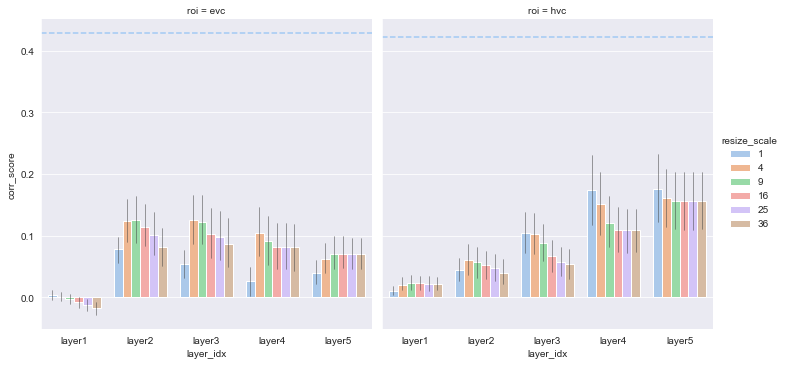

In [8]:
# fmri visualization

for set_idx in datasets_n:
    for resize in resize_type:

        plot_df = fmri_df[fmri_df['resize_type']==resize]
        plot_df = plot_df[plot_df['set_idx']==f'dataset{set_idx}']

        # compute noise ceiling
        [evc_ceil, hvc_ceil] = compute_noise_ceiling('fmri', set_idx)

        # resizing
        plt.figure()
        plt.suptitle(f'dataset{set_idx} resizing by {resize}')
        graph = sns.catplot(data=plot_df, x='layer_idx', y='corr_score', 
                            hue='resize_scale', col='roi', kind='bar', errwidth=0.5)

        ax1, ax2 = graph.axes[0]
        ax1.axhline(evc_ceil, ls='--')
        ax2.axhline(hvc_ceil, ls='--')

<Figure size 432x288 with 0 Axes>

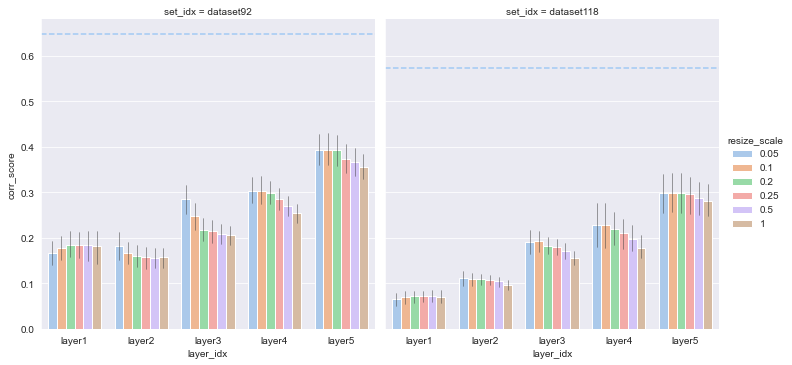

<Figure size 432x288 with 0 Axes>

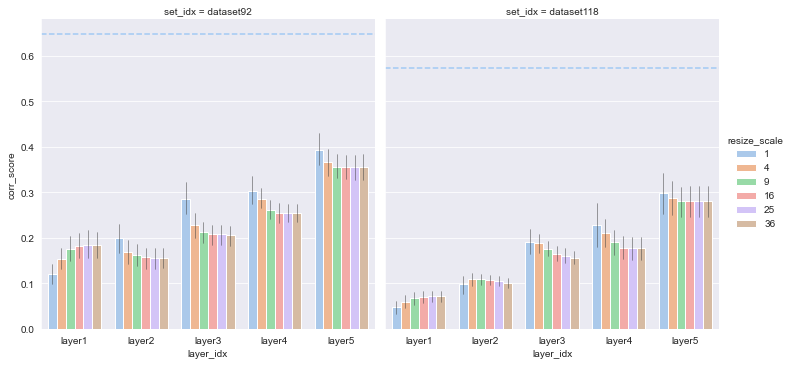

In [9]:
# behavior visualization

for resize in resize_type:

    plot_df = behavior_df[behavior_df['resize_type']==resize]

    # compute noise ceiling
    behavior_ceil_92 = compute_noise_ceiling('behavior', 92)
    behavior_ceil_118 = compute_noise_ceiling('behavior', 118)

    # resizing
    plt.figure()
    plt.suptitle(f'resizing by {resize}')
    graph = sns.catplot(data=plot_df, x='layer_idx', y='corr_score', 
                        hue='resize_scale', col='set_idx', kind='bar', errwidth=0.5)

    ax1, ax2 = graph.axes[0]
    ax1.axhline(behavior_ceil_92, ls='--')
    ax2.axhline(behavior_ceil_118, ls='--')
